# Data Cleaning Studio

You are part of a team working for an agricultural nonprofit based in California. Your nonprofit focuses on helping farmers in the state grow profitable crops in environmentally-friendly ways in an effort to reduce the impact of climate change on the state and provide enough food for the state's 39.5 million residents. With Halloween on the horizon, you and your team are looking to analyze past pumpkin crops to try and answer several questions:
1. Are pumpkins sold at terminal markets in California (San Francisco and Los Angeles) grown in California?
1. Is the harvest season for pumpkins grown in California consistent year-to-year?
1. Are pumpkin farmers growing specific varieties of pumpkins for specific reasons?

The answers to these questions will help your nonprofit decide if they should promote specific varieties or growing practices to the farmers they serve in time for seeds to be planted next year. Your team has already performed some exploratory analysis on the San Francisco terminal market report of pumpkin sales from 9/2016-9/2017. Now it is time to clean the data!

Before diving in to cleaning the data, here is a quick guide to the different columns in the USDA report and what they mean:
- Commodity Name: This CSV structure is used for lots of USDA reports. In this case, the commodity is pumpkins
- City Name: City where the pumpkin was sold. The city is a terminal market location within the United States.
- Type: This refers to the type of farming used in growing the pumpkins
- Package: The way the pumpkins were packed for sale
- Variety: Specific type of pumpkin, i.e. pie pumpkin or a Howden pumpkin
- Sub Variety: Addition classifications about the pumpkins, i.e. is it a flat pumpkin?
- Grade: In the US, usually only canned pumpkin is graded
- Date: Date of sale (rounded up to the nearest Saturday)
- Low Price: This price is in reference to sale price
- High Price: This price is in reference to sale price
- Mostly Low: This column is not measured for pumpkins
- Mostly High: This column is not measured for pumpkins
- Origin: Which state the pumpkins were grown in
- Origin District: Additional information about pumpkins' origin location
- Item Size: Abbreviations denoting size, i.e. jbo = jumbo, lrg = large
- Color: Color of pumpkins
- Environment: Additional information about pumpkins' growing environment
- Unit of Sale: The unit the customer bought at market, i.e. if they bought pumpkins by the pound, the data should say "PER LB" or  if they bought pumpkins by the bin, it would say "PER BIN"
- Quality: Additional notes about pumpkin quality as necessary
- Condition: Additional notes about pumpkin condition as necessary
- Appearance: Additional notes about pumpkin appearance as necessary
- Storage: Additional notes about pumpkin storage as necessary
- Crop: Additional notes about pumpkin crop as necessary
- Repack: Whether the pumpkin has been repackaged before sale
- Trans Mode: Mode of transportation used to get pumpkins to terminal market

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("~/Dropbox/LC_DA/Git/DataCleaning-Pumpkin-Sales/san-fransisco_9-24-2016_9-30-2017.csv")

In [2]:
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,135.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,135.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [3]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 78%
Package - 0%
Variety - 0%
Sub Variety - 61%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 100%
Item Size - 75%
Color - 72%
Environment - 100%
Unit of Sale - 100%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [4]:
# Checking the overall percentage of missing data from the data set

total_cells = np.product(data.shape)

missing_cells = pd.isnull(data).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data")    

51.0 % Missing cells from the data


### Question 1: 

Look at the percentages of missing data per coluum.  There are quite a few columns with less than 100% of the data.  What do you want to do with each column?   Consider the following options for each and write down your thoughts in a box below this one.
1. Drop the Observation
1. Drop the Feature
1. Impute the Missing Values
1. Replace the Missing Values

In [5]:
# Answer Question 1 here:
#I belive for columns with less than 75% of the data that it would be best to drop the feature/delete the column. 
#Imputation or replacement should only be used on columns with a small amount of missing data, perhaps less than 30%
#I would only drop the row or observation if that observatoin had more than half of the data missing.



In [6]:
# Repack Column
data["Repack"] = data["Repack"].replace({"N":False})
#Check status with a quick head check
data.head(3)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,PUMPKINS,SAN FRANCISCO,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,155.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


# Question 2:

Look at the "Type" column.  This column contains two values, "Organic" and "NaN".  
When it comes to food, food is either typically designated as "Organic" or "Conventional" based on farming practices.  

Do you think we should update the "NaN" values to "Conventional"?  Why or Why not?

In [7]:
# Answers Question 2:
#No, because NaN implies that we do not have the information at all, not that just because it is not organic it must be conventional
#However, if you can talk to the person or entity that collected the data, and they can confirm perhaps that perhaps data is only collected if the obs was organic (such that you can deduce that if it is not organic it had to be conventional), then that would make sense. 
#But you would need some more follow up questions about how the data was collected in order to make this decision. 



In [8]:
# Fill the Missing Values in the Type Column
data["Type"] = data["Type"].fillna("Conventional")

# Question 3

Based on the information provided by our team, "Grade" is only applied to canned pumpkin.  
These were all uncanned, whole pumpkins.  This column is irrelevant to the dataset.

We are going to drop the column.  Do you agree with this choice?  Why or why not?

In [9]:
# Answer Question 3 here:
#I agree. Not only is the information irrelevant to the question, but the data itself does not provide unique or novel information (specifically because it is all missing).

In [10]:
# Grade Column 
data = data.drop(["Grade"], axis=1) 

In [11]:
#Check with shape
data.shape

(166, 24)

# Question 4

Decide which columns are relevant and irrelevant as a group.

Do you think any of the columns empty for a reason?  What reason do you think? 
Is this intentional or unintentional?  
What do you think?

In [12]:
# Explain your rationale breifly here: 
# I would drop all columns with 100% of the missing data
#However, columns that are missing more than 30% of the data (Sub Variety, Item Size, and Color) are relevant to the 3rd buisness question
#However, that would that be a large imputation of missing data, so we would need to seek justifaction for filling in the missing data (i.e., does it make sense based on how the data was collected) )
# Or, we could imput 'Missing' or 'unknow' and run analyses on the data that is available
#This would depend on two things: 1) What analyses are we planning to run with that variable, and 2) Will the analyses be appropriatly powered if we only use a small subset of the data?

In [43]:
# Drop the ones you decide are irrelevant using the code we used to drop the "Grade Column"
data = data.drop(["Origin District","Environment","Unit of Sale","Quality","Condition","Appearance", "Storage","Crop","Trans Mode"], axis=1) 
data.shape

(166, 15)

# Question 5:

Plot the outliers for them.
histogram of date vs. sales


What do you think about the dates?  

In [14]:
# Answer 5 here:
#There are some outliers (Jan 7 2017. 1/14/17, 9/2/17, etc); however, there is not a pattern related to timeline (e.g., dates seem random without further context)

<Axes: >

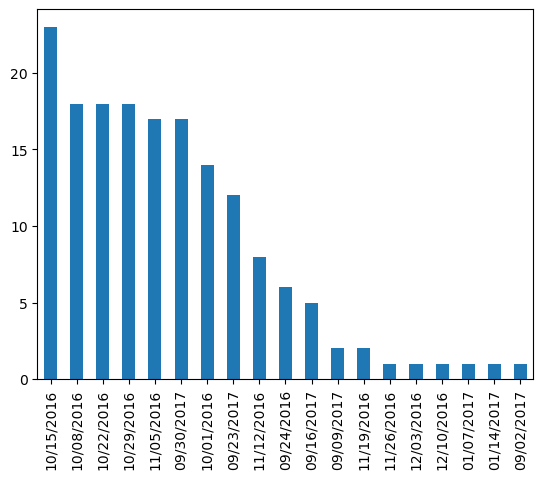

In [15]:
# # bar chart -  distribution of a categorical variable
data['Date'].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '09/24/2016'),
  Text(1, 0, '10/01/2016'),
  Text(2, 0, '10/08/2016'),
  Text(3, 0, '10/15/2016'),
  Text(4, 0, '10/22/2016'),
  Text(5, 0, '10/29/2016'),
  Text(6, 0, '11/05/2016'),
  Text(7, 0, '11/12/2016'),
  Text(8, 0, '09/09/2017'),
  Text(9, 0, '09/16/2017'),
  Text(10, 0, '09/23/2017'),
  Text(11, 0, '09/30/2017'),
  Text(12, 0, '11/19/2016'),
  Text(13, 0, '11/26/2016'),
  Text(14, 0, '12/03/2016'),
  Text(15, 0, '12/10/2016'),
  Text(16, 0, '01/07/2017'),
  Text(17, 0, '01/14/2017'),
  Text(18, 0, '09/02/2017')])

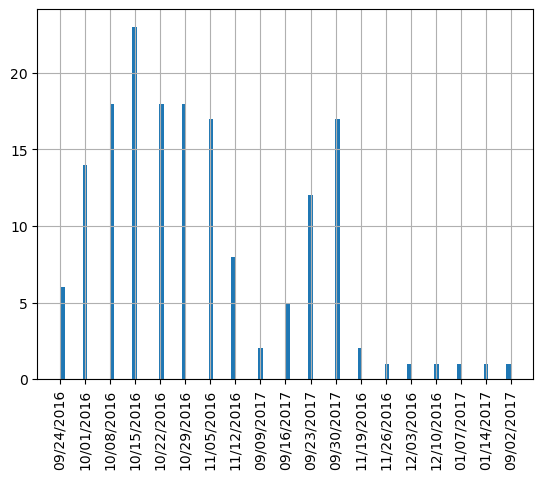

In [16]:
# # histogram of dates.
data['Date'].hist(bins=100)
plt.xticks(rotation=90)

#ignore the lists above the histogram for right now.  Examine the histogram.

# Question 6:

Are there any points in this data set that you worry about inconsistencies? 
Where?  What would you want to check?  Why?

In [17]:
# Answer Question 6 here: 
#The package column - because all the obs are in different metrics (i.e., bins, cartons, each)

# Bonus Mission

Fix the LA page at this link: [A Year of Pumpkin Prices](https://www.kaggle.com/usda/a-year-of-pumpkin-prices)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

LA_df = pd.read_csv("~/Dropbox/LC_DA/Git/DataCleaning-Pumpkin-Sales/los-angeles_9-24-2016_9-30-2017.csv")

In [19]:
LA_df.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,LOS ANGELES,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,120.0,130.0,...,NaN,NaN,PER BIN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [20]:
LA_df.shape

(62, 25)

In [21]:
for col in LA_df.columns:
    pct_missing = np.mean(LA_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Type - 100%
Package - 0%
Variety - 0%
Sub Variety - 90%
Grade - 100%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Origin District - 50%
Item Size - 26%
Color - 84%
Environment - 100%
Unit of Sale - 15%
Quality - 100%
Condition - 100%
Appearance - 100%
Storage - 100%
Crop - 100%
Repack - 0%
Trans Mode - 100%


In [22]:
cols_large_missing=[]
for col in LA_df.columns:
    if ((np.mean(LA_df[col].isnull()))*100)>30:
        cols_large_missing.append(col)
    else:
        continue

print(cols_large_missing)
print(len(cols_large_missing))

['Type', 'Sub Variety', 'Grade', 'Origin District', 'Color', 'Environment', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop', 'Trans Mode']
12


In [23]:
LA_df_Clean1 = LA_df.drop(cols_large_missing, axis=1)
LA_df_Clean1.shape

(62, 13)

In [24]:
for col in LA_df_Clean1.columns:
    pct_missing = np.mean(LA_df_Clean1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Package - 0%
Variety - 0%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Item Size - 26%
Unit of Sale - 15%
Repack - 0%


<Axes: >

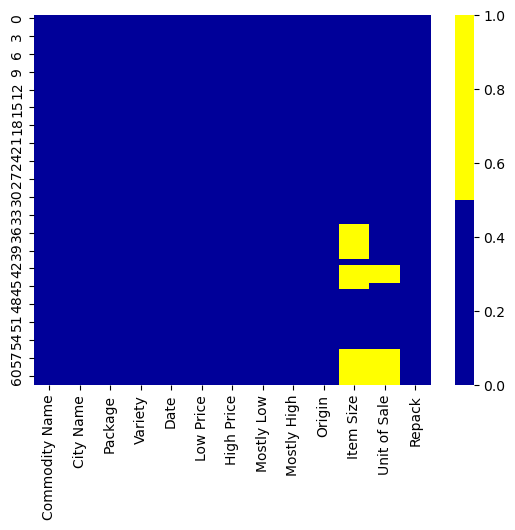

In [25]:
cols = LA_df_Clean1.columns
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(LA_df_Clean1[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: xlabel='Item Size', ylabel='Count'>

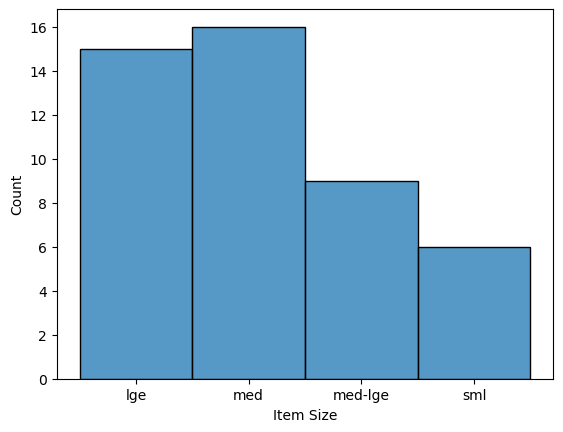

In [26]:
sns.histplot(data=LA_df_Clean1['Item Size'])

In [27]:
LA_df_Clean1['Item Size'].describe()

count      46
unique      4
top       med
freq       16
Name: Item Size, dtype: object

In [28]:
sum(LA_df_Clean1['Item Size'].isnull())

16

In [29]:
LA_df_Clean1['Item Size'] = LA_df_Clean1['Item Size'].fillna('Unknown')
sum(LA_df_Clean1['Item Size'].isnull())

0

In [30]:
for col in LA_df_Clean1.columns:
    pct_missing = np.mean(LA_df_Clean1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Package - 0%
Variety - 0%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Item Size - 0%
Unit of Sale - 15%
Repack - 0%


<Axes: xlabel='Unit of Sale', ylabel='Count'>

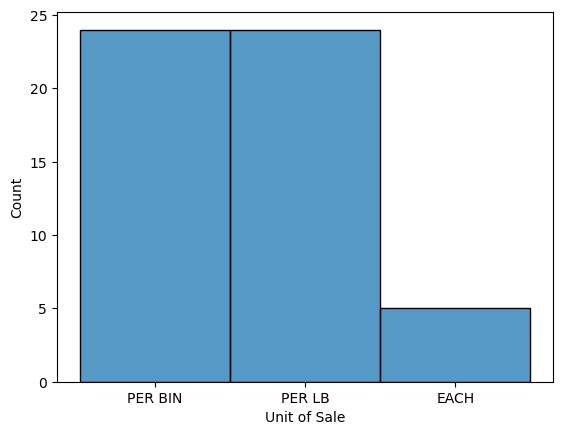

In [31]:
sns.histplot(data=LA_df_Clean1['Unit of Sale'])

In [32]:
LA_df_Clean1['Unit of Sale'].describe()

count          53
unique          3
top       PER BIN
freq           24
Name: Unit of Sale, dtype: object

In [33]:
sum(LA_df_Clean1['Unit of Sale'].isnull())

9

In [34]:
LA_df_Clean1['Unit of Sale'] = LA_df_Clean1['Unit of Sale'].fillna('PER CARTON')
sum(LA_df_Clean1['Unit of Sale'].isnull())

0

In [35]:
for col in LA_df_Clean1.columns:
    pct_missing = np.mean(LA_df_Clean1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Commodity Name - 0%
City Name - 0%
Package - 0%
Variety - 0%
Date - 0%
Low Price - 0%
High Price - 0%
Mostly Low - 0%
Mostly High - 0%
Origin - 0%
Item Size - 0%
Unit of Sale - 0%
Repack - 0%


In [36]:
LA_df_Clean1.head(60)

,Commodity Name,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Unit of Sale,Repack
0,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,09/24/2016,120.00,130.00,120.00,130.00,CALIFORNIA,lge,PER BIN,N
1,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,09/24/2016,120.00,130.00,120.00,130.00,CALIFORNIA,med,PER BIN,N
2,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/01/2016,120.00,130.00,120.00,130.00,CALIFORNIA,lge,PER BIN,N
3,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/01/2016,120.00,130.00,120.00,130.00,CALIFORNIA,med,PER BIN,N
4,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/08/2016,120.00,130.00,120.00,130.00,CALIFORNIA,lge,PER BIN,N
5,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/08/2016,120.00,130.00,120.00,130.00,CALIFORNIA,med,PER BIN,N
6,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/15/2016,120.00,130.00,120.00,130.00,CALIFORNIA,lge,PER BIN,N
7,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/15/2016,120.00,130.00,120.00,130.00,CALIFORNIA,med,PER BIN,N
8,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/22/2016,120.00,130.00,120.00,130.00,CALIFORNIA,lge,PER BIN,N
9,PUMPKINS,LOS ANGELES,24 inch bins,HOWDEN TYPE,10/22/2016,120.00,130.00,120.00,130.00,CALIFORNIA,med,PER BIN,N


In [37]:
LA_df_Clean1['Repack'].describe()

count     62
unique     1
top        N
freq      62
Name: Repack, dtype: object

In [38]:
cols_not_unique=[]
for col in LA_df_Clean1.columns:
    if len(pd.unique(LA_df_Clean1[col]))<=1:
        cols_not_unique.append(col)
    else:
        continue
        
print(cols_not_unique)
print(len(cols_not_unique))

['Commodity Name', 'City Name', 'Origin', 'Repack']
4


In [39]:
LA_df_Clean2 = LA_df_Clean1.drop(cols_not_unique, axis=1)
LA_df_Clean2.shape

(62, 9)

In [40]:
LA_df_Clean2.head(60)

,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Item Size,Unit of Sale
0,24 inch bins,HOWDEN TYPE,09/24/2016,120.00,130.00,120.00,130.00,lge,PER BIN
1,24 inch bins,HOWDEN TYPE,09/24/2016,120.00,130.00,120.00,130.00,med,PER BIN
2,24 inch bins,HOWDEN TYPE,10/01/2016,120.00,130.00,120.00,130.00,lge,PER BIN
3,24 inch bins,HOWDEN TYPE,10/01/2016,120.00,130.00,120.00,130.00,med,PER BIN
4,24 inch bins,HOWDEN TYPE,10/08/2016,120.00,130.00,120.00,130.00,lge,PER BIN
5,24 inch bins,HOWDEN TYPE,10/08/2016,120.00,130.00,120.00,130.00,med,PER BIN
6,24 inch bins,HOWDEN TYPE,10/15/2016,120.00,130.00,120.00,130.00,lge,PER BIN
7,24 inch bins,HOWDEN TYPE,10/15/2016,120.00,130.00,120.00,130.00,med,PER BIN
8,24 inch bins,HOWDEN TYPE,10/22/2016,120.00,130.00,120.00,130.00,lge,PER BIN
9,24 inch bins,HOWDEN TYPE,10/22/2016,120.00,130.00,120.00,130.00,med,PER BIN


In [41]:
LA_df_Clean1['Bin_Size']=pd.Series(dtype=float)

LA_df_Clean1['Bin_Size']=LA_df_Clean1['Package'].str.split()

LA_df_Clean1['Bin_Size'].head()

0    [24, inch, bins]
1    [24, inch, bins]
2    [24, inch, bins]
3    [24, inch, bins]
4    [24, inch, bins]
Name: Bin_Size, dtype: object

In [42]:
To_remove_lst = ['inch', 'bin','lb','cartons','each']

import re
LA_df_Clean1['Bin_Size'] = LA_df_Clean1['Bin_Size'].str.replace('|'.join(To_remove_lst), '')

LA_df_Clean1['Bin_Size'].head()

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_65850/618017697.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  LA_df_Clean1['Bin_Size'] = LA_df_Clean1['Bin_Size'].str.replace('|'.join(To_remove_lst), '')


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Bin_Size, dtype: float64